# Feedforward Neural Network on MNIST Dataset

### Imports

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### Device Configuration

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Hyper Parameters

In [3]:
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### MNIST Dataser & Dataloader

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Example

In [5]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


### Plotting

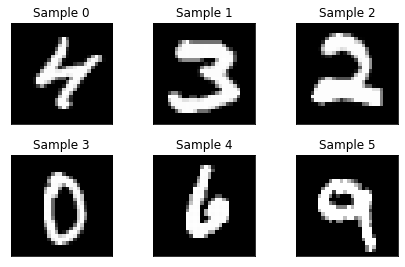

In [6]:

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(samples[i][0], cmap='gray', interpolation='none')
    plt.title(f"Sample {i}")
    plt.xticks([])
    plt.yticks([])

### Model

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [8]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

### Loss & Optimizer

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training Loop

In [10]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 300 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [300/600], Loss: 0.2817
Epoch [1/5], Step [600/600], Loss: 0.2037
Epoch [2/5], Step [300/600], Loss: 0.1540
Epoch [2/5], Step [600/600], Loss: 0.1274
Epoch [3/5], Step [300/600], Loss: 0.0602
Epoch [3/5], Step [600/600], Loss: 0.1060
Epoch [4/5], Step [300/600], Loss: 0.1060
Epoch [4/5], Step [600/600], Loss: 0.0625
Epoch [5/5], Step [300/600], Loss: 0.0375
Epoch [5/5], Step [600/600], Loss: 0.0883


### Test

In [12]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value, index
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 97.02 %
